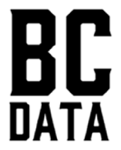

# Black Cat Data - Data Science and AI
## Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\john.osorio\Desktop\BLACK CAT\Student Materials-20180820T065027Z-001\Student Materials\DataScience-AI-master\Labs\dat\Blood Transfusion\transfusion.data')

In [3]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [5]:
#Number of features
df.columns.shape

(5,)

In [6]:
#Well at least there are no null values
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [10]:
X = df.drop(['whether he/she donated blood in March 2007'], axis = 1)
y = df['whether he/she donated blood in March 2007']

In [19]:
len(y)

748

In [18]:
y[y == 1].sum()

178

Only 178 people in total donated blood out of 748

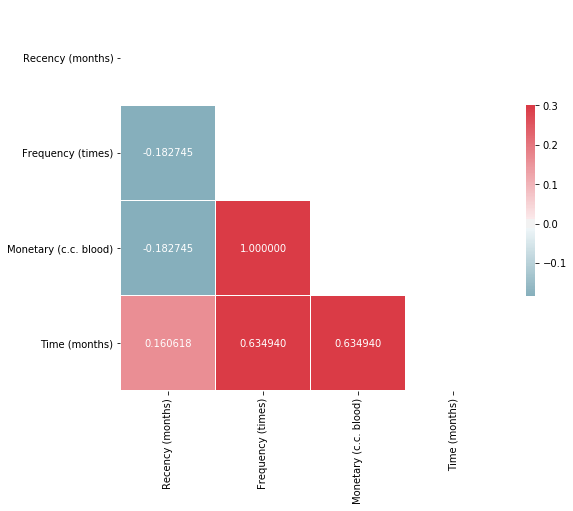

In [20]:
#Draw the correlation matrix
corr = X.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Let's set up the matplotlib figure
fig, ax = plt.subplots(figsize = (9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot = True, fmt = 'f')

# As shown above, Monetary and Frequency has the highest correlation so I'll use those two features first

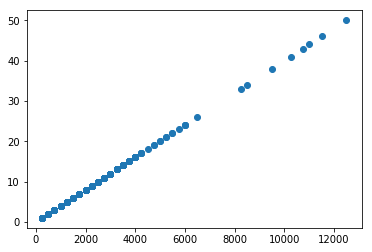

In [21]:
plt.scatter(x = X['Monetary (c.c. blood)'], y = X['Frequency (times)'])
plt.show()

# What the hell is this???

# It might help if I normalize the data?

In [22]:
from sklearn.preprocessing import normalize

In [23]:
X_norm = normalize(X)
X_norm_df = pd.DataFrame(X_norm, columns = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'])
X_norm_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,0.000160,0.004,0.999961,0.007840
1,0.000000,0.004,0.999955,0.008615
2,0.000250,0.004,0.999954,0.008750
3,0.000400,0.004,0.999951,0.009000
4,0.000167,0.004,0.999910,0.012832


Above is the now normalised data

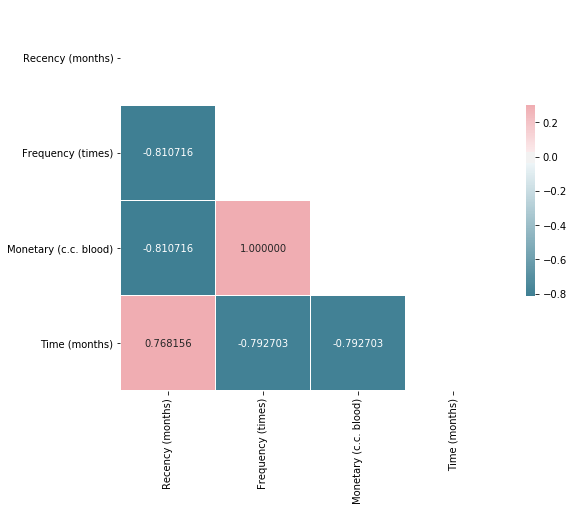

In [24]:
#Draw the correlation matrix
corr = X_norm_df.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Let's set up the matplotlib figure
fig, ax = plt.subplots(figsize = (9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot = True, fmt = 'f')

# I don't like what it's giving me so I'll just use forward selection to know which features to use

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

# Let's use forward selection (from LAB 4.2)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_df, y, random_state = 42, train_size = 0.8)

C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
show_steps = True

In [27]:
# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = DecisionTreeClassifier(max_depth = 2) # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X_norm_df.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            
            # Add the new_column variable in the "included" list
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

            
        X_train_new = X_train[included + [new_column]]
#         print(X_train_new.head())
       
        # fit the model with the Training data
        fit = model.fit(X_train_new,y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train_new, y_train) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) ) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = Recency (months), Monetary (c.c. blood), Frequency (times), Time (months)
(Step) Trying Recency (months)...
(Step) - Features = Recency (months)
(Step) - Adjusted R^2: This = 0.783; Best = 0.000
(Step) - New Best!   : Feature = Recency (months); R^2 = 0.784; Adjusted R^2 = 0.783
(Step) Trying Monetary (c.c. blood)...
(Step) - Features = Monetary (c.c. blood)
(Step) - Adjusted R^2: This = 0.781; Best = 0.783
(Step) Trying Frequency (times)...
(Step) - Features = Frequency (times)
(Step) - Adjusted R^2: This = 0.763; Best = 0.783
(Step) Trying Time (months)...
(Step) - Features = Time (months)
(Step) - Adjusted R^2: This = 0.763; Best = 0.783
Added feature Recency (months) with R^2 = 0.784 and adjusted R^2 = 0.783

(Step) Excluded = Monetary (c.c. blood), Frequency (times), Time (months)
(Step) Trying Monetary (c.c. blood)...
(Step) - Features = Recency (months), Monetary (c.c. blood)
(Step) - Adjusted R^2: This = 0.800; Best = 0.783
(Step) - New Best!   : Feature = Mo

# So the best features were apparently Recency and Time 

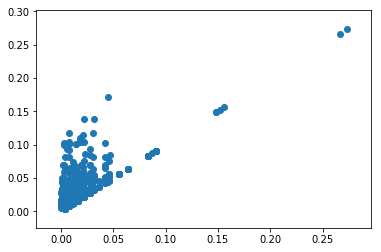

<Figure size 1080x720 with 0 Axes>

In [28]:
plt.scatter(x = X_norm_df['Recency (months)'], y = X_norm_df['Time (months)'])
plt.figure(figsize = (15, 10))
plt.show()

# Well it looks better but still not pretty plus it looks like there are around 5 outliers :(

In [29]:
df_norm = normalize(df.drop(['whether he/she donated blood in March 2007'], axis = 1))
df_norm_new = pd.DataFrame(df_norm, columns = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'])
df_norm_new['whether he/she donated blood in March 2007'] = y
df_norm_new.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,0.000160,0.004,0.999961,0.007840,1
1,0.000000,0.004,0.999955,0.008615,1
2,0.000250,0.004,0.999954,0.008750,1
3,0.000400,0.004,0.999951,0.009000,1
4,0.000167,0.004,0.999910,0.012832,0


# Let's remove the outliers

In [30]:
df_new = df_norm_new.loc[(df_norm_new['Time (months)'] <= 0.13)]

X_new = df_new.drop(['Frequency (times)', 'Monetary (c.c. blood)', 'whether he/she donated blood in March 2007'], axis = 1)
y_new = df_new['whether he/she donated blood in March 2007']
X_new.head()

,Recency (months),Time (months)
0,0.000160,0.007840
1,0.000000,0.008615
2,0.000250,0.008750
3,0.000400,0.009000
4,0.000167,0.012832


# It's looking better without the outliers

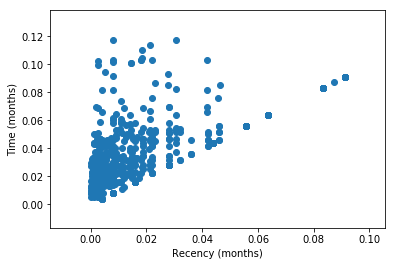

<Figure size 1080x720 with 0 Axes>

In [31]:
plt.scatter(x = X_new['Recency (months)'], y = X_new['Time (months)'])
plt.xlabel('Recency (months)')
plt.ylabel('Time (months)')
plt.figure(figsize = (15, 10))
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Our target variable is binary: if they donated blood last Mar 2007 or not (1 or 0)

# This is a supervised model with binary type classification

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [33]:
#Then split it again
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state = 42, train_size = 0.8)

C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [34]:
dec_tree = DecisionTreeClassifier(max_depth=2)

# Step 9: Fit the Model

In [35]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [36]:
#Change the X_test and y_test to numpy arrays
X_plot = np.array(X_test)
y_plot = np.array(y_test)


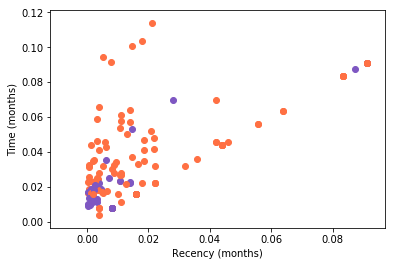

In [42]:
#Let's plot the actual data and target
color = ['#ff7043', '#7e57c2']
for index in range(X_plot.shape[0]):
    plt.scatter(x = X_plot[index][0], y = X_plot[index][1], c = color[y_plot[index]])

plt.xlabel('Recency (months)')
plt.ylabel('Time (months)')
plt.show()

# The plot above are the actual targets where the orange ones are the ones who did not donate blood

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [43]:
def visualize_tree(estimator, X, y, boundaries = True,
                   xlim = None, ylim = None, ax = None):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y, s = 30, cmap = 'viridis', zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()

    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num = 200),
                         np.linspace(*ylim, num = 200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                           levels = np.arange(n_classes + 1) - 0.5,
                           cmap = 'viridis',
                           zorder = 1)

    ax.set(xlim = xlim, ylim = ylim)

    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_

            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder = 2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)

            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder = 2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])

    if boundaries:
        plot_boundaries(0, xlim, ylim)

depth is: 0
depth is: 1
depth is: 2
depth is: 3


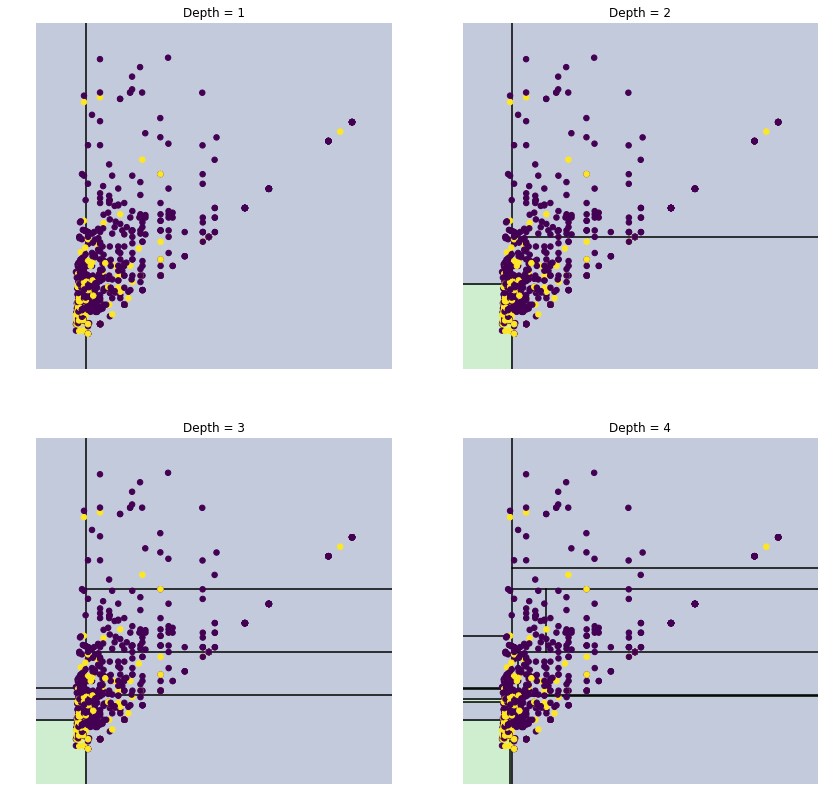

In [44]:
fig, ax = plt.subplots(2, 2, figsize = (14, 14))

r, c = (0, 0)
for depth in range(ax.shape[0] * ax.shape[1]):
    visualize_tree(DecisionTreeClassifier(max_depth = depth + 1), X_new, y_new, ax = ax[r, c])
    ax[r, c].set_title('Depth = %d' % (depth + 1))
    c += 1
    if c == ax.shape[1]:
        r += 1
        c = 0
    print('depth is: ' + str(depth))

plt.show()

# The function and code above was copy pasted directly from Lab 7.1 demo. As we can see, it's still better to use max_depth = 2

# The puple ones are the people who did not donate blood

# Let's  have a look at the confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [49]:
y_pred = dec_tree.predict(X_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(decision_tree_confusion_matrix, columns = ['not donated blood', 'donated blood'], 
                              index = ['not donated blood', 'donated blood'])
conf_matrix_df.index.name = 'Prediction Class'
print('                           Actual Class')
print(conf_matrix_df)

                           Actual Class
                   not donated blood  donated blood
Prediction Class                                   
not donated blood                105              5
donated blood                     25             13


# And now for the accuracy

In [47]:
dec_tree.score(X_test, y_test)

0.7972972972972973

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions